In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np

In [3]:
data = pd.read_csv('merged-data-COMBINED-WOL.csv')

grouped_data_d = data.groupby('Basket_ID')['CategoryDDescription'].apply(lambda x: ', '.join(x)).reset_index()
grouped_data_d = grouped_data_d.rename(columns={'CategoryDDescription': 'items bought'})


item_pairs = {}


for index, row in grouped_data_d.iterrows():
    
    
    items_list = row['items bought'].split(', ')
    
    
    for i in range(len(items_list)-1):
        item_pair = tuple(sorted([items_list[i], items_list[i+1]]))
        if item_pair in item_pairs:
            item_pairs[item_pair] += 1
        else:
            item_pairs[item_pair] = 1


for item_pair, weight in item_pairs.items():
    print(f"{item_pair}: {weight}")

('fresh milk ', 'kitcher roll'): 88
('kitcher roll', 'salt'): 15
('cinamon', 'salt'): 2
('chorizo', 'soft cheese '): 118
('poultry', 'sweet dough'): 8
('poultry', 'spaghetti'): 15
('brown rice', 'spaghetti'): 15
('brown rice', 'with chocolate'): 3
('LIMITED DURATION', 'LIMITED DURATION'): 99
('LIMITED DURATION', 'high pasterized '): 285
('fresh milk ', 'high pasterized '): 261
('fete', 'fresh milk '): 30
('crumpets', 'fete'): 9
('crumpets', 'poweder'): 66
('KITCHEN SMALL TOOLS', 'poweder'): 3
('KITCHEN SMALL TOOLS', 'with fat'): 2
('tomato', 'with fat'): 67
('pasta', 'tomato'): 73
('herbal drinks', 'pasta'): 6
('herbal drinks', 'tuna'): 2
('salt', 'tuna'): 7
('antibactetia spray', 'salt'): 10
('antibactetia spray', 'boil bag'): 1
('boil bag', 'cheese spreads'): 1
('crumpets', 'high pasterized '): 51
('Hard cheese', 'feta'): 40
('feta', 'sweeteners'): 1
('biscuits', 'sweeteners'): 3
('biscuits', 'with chocolate'): 7
('fresh', 'kitcher roll'): 25
('biscuits', 'kitcher roll'): 15
('biscui

26K IDENTIFIED

C:\Users\Thilo\AppData\Local\Temp\ipykernel_10136\3666660304.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Spectral_r', max(node_colors)-min(node_colors)+1)
C:\Users\Thilo\AppData\Local\Temp\ipykernel_10136\3666660304.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


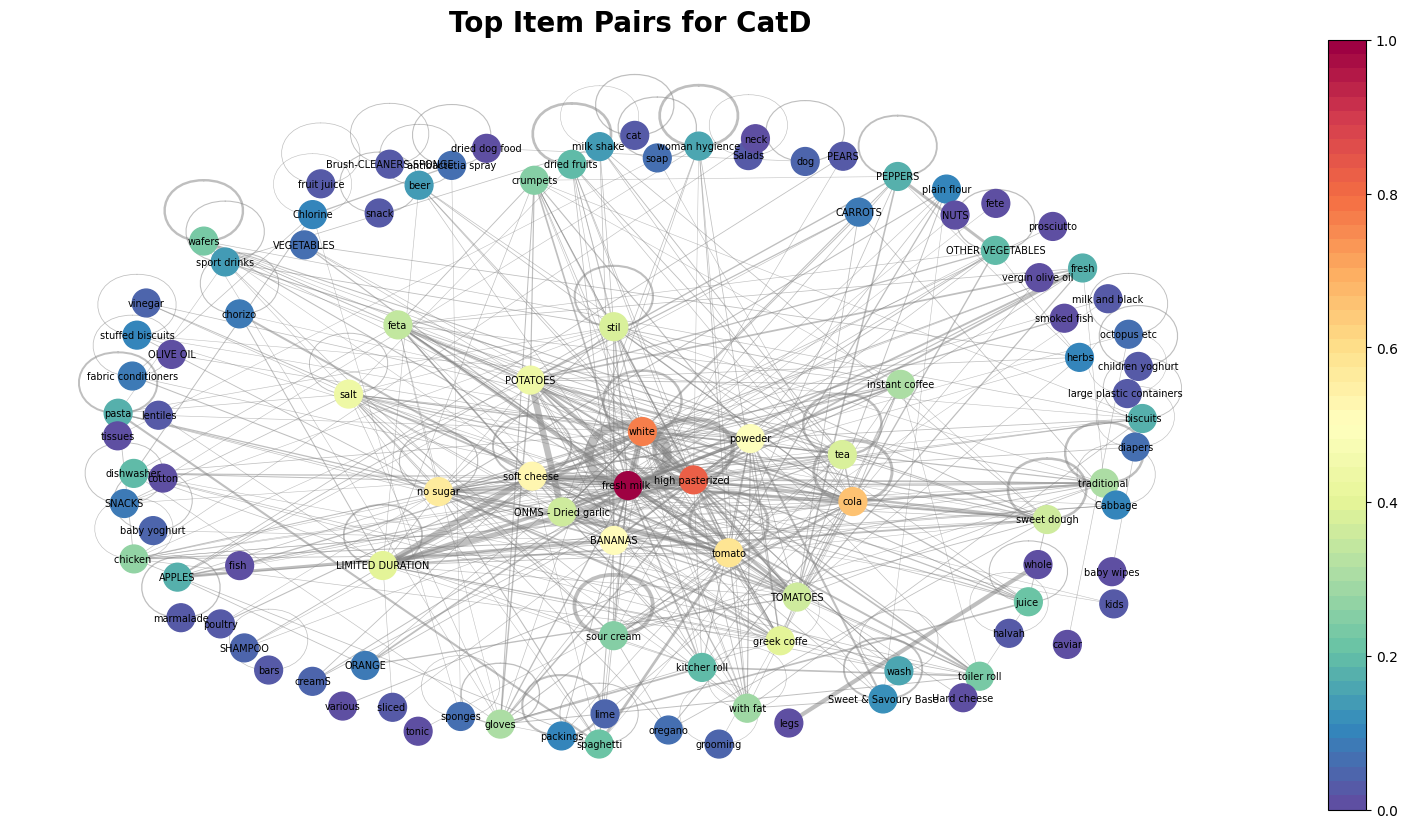

In [13]:
top_item_pairs = sorted(item_pairs.items(), key=lambda x: x[1], reverse=True)[:500]

G = nx.Graph()

for pair, weight in top_item_pairs:
    G.add_edge(pair[0], pair[1], weight=weight)

pos = nx.spring_layout(G, k=7, iterations=50)

node_degrees = dict(G.degree())
node_colors = np.array([node_degrees[n] for n in G.nodes()])
cmap = plt.cm.get_cmap('Spectral_r', max(node_colors)-min(node_colors)+1)

plt.figure(figsize=(20, 10))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=cmap, node_size=400)
nx.draw_networkx_labels(G, pos, font_size=7, font_family='sans-serif')

widths = [G[u][v]['weight']/80 for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=widths, edge_color='gray', alpha=0.5)

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
plt.colorbar(sm)

plt.title('Top Item Pairs for CatD', fontsize=20, fontweight='bold')
plt.axis('off')
plt.show()